In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score,classification_report
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Understanding The DATA

In [2]:
df=pd.read_csv('spam.csv',encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.drop(['Unnamed: 2','Unnamed: 4','Unnamed: 3'],inplace=True,axis=1)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df['v2'][7:13]

7     As per your request 'Melle Melle (Oru Minnamin...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
10    I'm gonna be home soon and i don't want to tal...
11    SIX chances to win CASH! From 100 to 20,000 po...
12    URGENT! You have won a 1 week FREE membership ...
Name: v2, dtype: object

In [8]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [9]:
df.duplicated().sum()

403

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(5169, 2)

In [12]:
df.sample(10)

,v1,v2
4503,ham,She told to hr that he want posting in chennai...
3377,ham,Hows that watch resizing
3276,ham,Its a great day. Do have yourself a beautiful ...
4252,ham,Juz now havent woke up so a bit blur blur... C...
2288,ham,Dont you have message offer
534,ham,I've not called you in a while. This is hoping...
4605,ham,Oh... Haha... Den we shld had went today too.....
193,ham,It will stop on itself. I however suggest she ...
141,ham,"Sir, Waiting for your mail."
2721,ham,I'm working technical support :)voice process.


## EDA

<Axes: xlabel='v1'>

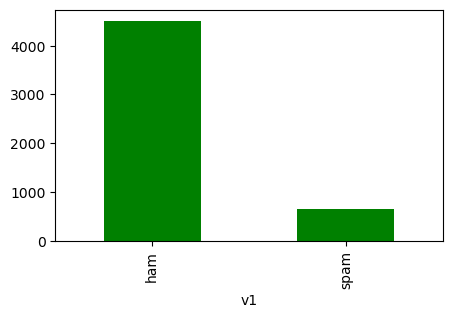

In [13]:
plt.figure(figsize=(5,3))
df['v1'].value_counts().plot(kind='bar',color='g')

## Conclusion :  Data Is Imbalanced

In [14]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df=df.rename(columns={'v1':'target','v2':'text'})

In [16]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## ham----> 0
## spam----> 1

In [17]:
df['target']=df['target'].map({'ham':0,'spam':1})

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df = df.reindex(columns=['text','target'])
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [20]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [21]:
df.duplicated().sum()

0

## Data Cleaning

In [22]:
df['text']=df['text'].apply(lambda x: x.lower())

In [23]:
df.head()

,text,target
0,"go until jurong point, crazy.. available only ...",0
1,ok lar... joking wif u oni...,0
2,free entry in 2 a wkly comp to win fa cup fina...,1
3,u dun say so early hor... u c already then say...,0
4,"nah i don't think he goes to usf, he lives aro...",0


## WORD TOKENIZE AND REMOVE STOPWORDS

In [24]:
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
df['cleaned_text'] = df['text'].apply(remove_stopwords)

# Find unique stopwords that were removed
all_stopwords_removed = set()
for text in df['text']:
    words = text.split()
    for word in words:
        if word.lower() in stop_words:
            all_stopwords_removed.add(word.lower())

# Number of unique stopwords removed
unique_stopwords_removed_count = len(all_stopwords_removed)

print("Cleaned Text Column:")
print(df['cleaned_text'])
print("\nUnique Stopwords Removed:")
print(all_stopwords_removed)
print(f"\nNumber of Unique Stopwords Removed: {unique_stopwords_removed_count}")


Cleaned Text Column:
0       go jurong point, crazy.. available bugis n gre...
1                           ok lar... joking wif u oni...
2       free entry 2 wkly comp win fa cup final tkts 2...
3               u dun say early hor... u c already say...
4                 nah think goes usf, lives around though
                              ...                        
5567    2nd time tried 2 contact u. u å£750 pound priz...
5568                        ì_ b going esplanade fr home?
5569             pity, * mood that. so...any suggestions?
5570    guy bitching acted like i'd interested buying ...
5571                                      rofl. true name
Name: cleaned_text, Length: 5169, dtype: object

Unique Stopwords Removed:
{"won't", 'itself', 'will', 'while', 'here', 'our', 'i', 'o', 'won', 'yours', 'over', 'any', 'nor', 'am', 're', 'which', 'who', "wasn't", 'just', 'was', 'against', 'your', 'very', "you've", 'a', 'herself', 'its', 'through', 'other', 'with', 'does', 'some', 'can', 'm

In [25]:
df.head()

,text,target,cleaned_text
0,"go until jurong point, crazy.. available only ...",0,"go jurong point, crazy.. available bugis n gre..."
1,ok lar... joking wif u oni...,0,ok lar... joking wif u oni...
2,free entry in 2 a wkly comp to win fa cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...
3,u dun say so early hor... u c already then say...,0,u dun say early hor... u c already say...
4,"nah i don't think he goes to usf, he lives aro...",0,"nah think goes usf, lives around though"


In [26]:
import re
# Function to clean text
def clean_text(text):
    # Define pattern to remove hashtags, commas, exclamation marks, and other symbols
    pattern = r'[@#,.!&?*(){}[\]:;\"\'<>~`^]'
    # Use re.sub to replace matched symbols with an empty string
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

# Apply the function to the cleaned_text column
df['cleaned_text'] = df['cleaned_text'].apply(clean_text)



In [27]:
df.head()

,text,target,cleaned_text
0,"go until jurong point, crazy.. available only ...",0,go jurong point crazy available bugis n great ...
1,ok lar... joking wif u oni...,0,ok lar joking wif u oni
2,free entry in 2 a wkly comp to win fa cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...
3,u dun say so early hor... u c already then say...,0,u dun say early hor u c already say
4,"nah i don't think he goes to usf, he lives aro...",0,nah think goes usf lives around though


In [28]:
df['cleaned_text'][5569]

'pity  mood that soany suggestions'

In [29]:
df.drop('text',axis=1,inplace=True)

In [30]:
df.head()

,target,cleaned_text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah think goes usf lives around though


In [31]:
df=df.reindex(columns=['cleaned_text','target'])

In [32]:
df.head()

,cleaned_text,target
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry 2 wkly comp win fa cup final tkts 2...,1
3,u dun say early hor u c already say,0
4,nah think goes usf lives around though,0


## STEMMING 

In [33]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Define a function to apply stemming to a sentence
def stem_sentence(sentence):
    tokens = word_tokenize(sentence)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Apply the function to the 'text' column
df['stemmed_text'] = df['cleaned_text'].apply(stem_sentence)
df.head()


,cleaned_text,target,stemmed_text
0,go jurong point crazy available bugis n great ...,0,go jurong point crazi avail bugi n great world...
1,ok lar joking wif u oni,0,ok lar joke wif u oni
2,free entry 2 wkly comp win fa cup final tkts 2...,1,free entri 2 wkli comp win fa cup final tkt 21...
3,u dun say early hor u c already say,0,u dun say earli hor u c alreadi say
4,nah think goes usf lives around though,0,nah think goe usf live around though


In [34]:
df.drop('cleaned_text',axis=1,inplace=True)

In [35]:
df=df.reindex(columns=['stemmed_text','target'])
df.head()

,stemmed_text,target
0,go jurong point crazi avail bugi n great world...,0
1,ok lar joke wif u oni,0
2,free entri 2 wkli comp win fa cup final tkt 21...,1
3,u dun say earli hor u c alreadi say,0
4,nah think goe usf live around though,0


In [36]:
from sklearn.model_selection import train_test_split
x=df['stemmed_text']
y=df['target']

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
vectorizer=TfidfVectorizer()

In [40]:
x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

## MODEL EVALUATION

# SVC

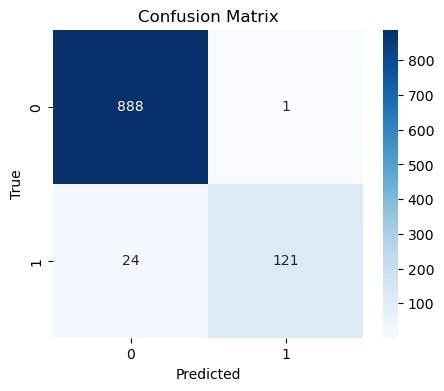


Metrics Dataframe:


,Metric,Value
0,Precision,0.976225
1,Recall,0.975822
2,Accuracy,0.975822


In [41]:
from sklearn.svm import SVC
clf_SVC = SVC()
clf_SVC.fit(x_train.toarray(), y_train)
y_pred = clf_SVC.predict(x_test.toarray())

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Create a dataframe for metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'Accuracy'],
    'Value': [precision, recall, accuracy]
})

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("\nMetrics Dataframe:")
metrics_df

## MULTINOMIAL NAIVE BAYES

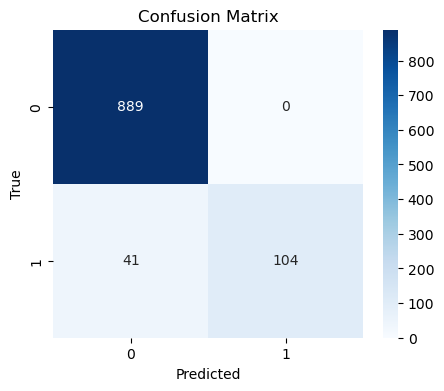


Metrics Dataframe:


,Metric,Value
0,Precision,0.962096
1,Recall,0.960348
2,Accuracy,0.960348


In [42]:
from sklearn.naive_bayes import MultinomialNB
clf_MNB = MultinomialNB()
clf_MNB.fit(x_train.toarray(), y_train)
y_pred = clf_MNB.predict(x_test.toarray())

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Create a dataframe for metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'Accuracy'],
    'Value': [precision, recall, accuracy]
})

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("\nMetrics Dataframe:")
metrics_df

## GAUSSIAN NAIVE BAYES

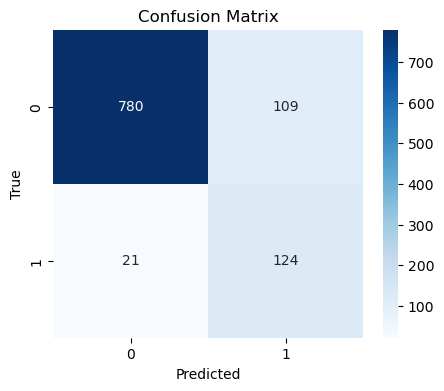


Metrics Dataframe:


,Metric,Value
0,Precision,0.911857
1,Recall,0.874275
2,Accuracy,0.874275


In [43]:
from sklearn.naive_bayes import GaussianNB
clf_GNB = GaussianNB()
clf_GNB.fit(x_train.toarray(), y_train)
y_pred = clf_GNB.predict(x_test.toarray())

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Create a dataframe for metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'Accuracy'],
    'Value': [precision, recall, accuracy]
})

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


print("\nMetrics Dataframe:")
metrics_df

## LINEAR REGRESSION

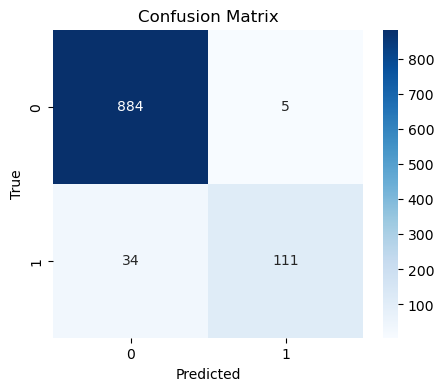


Metrics Dataframe:


,Metric,Value
0,Precision,0.962112
1,Recall,0.962282
2,Accuracy,0.962282


In [44]:
from sklearn.linear_model import LogisticRegression
clf_LR= LogisticRegression(max_iter=100)
clf_LR.fit(x_train.toarray(), y_train)
y_pred = clf_LR.predict(x_test.toarray())

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Create a dataframe for metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'Accuracy'],
    'Value': [precision, recall, accuracy]
})

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


print("\nMetrics Dataframe:")
metrics_df


# Conclusion : SVC GIVES THE BEST RESULT WITH TFIDF

## PREDICTION

In [45]:
y_test[0:7]

1617    0
2064    0
1272    0
3020    0
3642    0
1520    1
1159    0
Name: target, dtype: int64

In [46]:
y_pred[0:7]

array([0, 0, 0, 0, 0, 1, 0], dtype=int64)

## WORD2VEC (CBOW)

In [47]:
from gensim.models import Word2Vec
df['tokens'] = df['stemmed_text'].apply(word_tokenize)
model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, sg=0) 

# Function to average word vectors
def average_word_vectors(tokens, model, vector_size):
    vector = np.zeros(vector_size)
    num_words = 0
    for word in tokens:
        if word in model.wv.key_to_index:
            vector += model.wv[word]
            num_words += 1
    if num_words > 0:
        vector /= num_words
    return vector
vector_size = model.vector_size # Vector size from the model
df['vector'] = df['tokens'].apply(lambda x: average_word_vectors(x, model, vector_size)) # Transform each document into a vector

In [48]:
X = np.array(df['vector'].tolist())
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression (CBOW)

Logistic Regression Accuracy: 0.8597678916827853

classification_report               precision    recall  f1-score   support

           0       0.86      1.00      0.92       889
           1       0.00      0.00      0.00       145

    accuracy                           0.86      1034
   macro avg       0.43      0.50      0.46      1034
weighted avg       0.74      0.86      0.79      1034



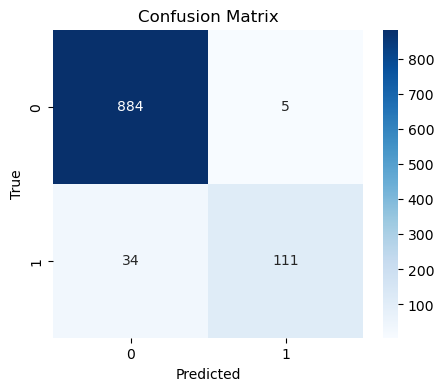

In [49]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print('\nclassification_report',classification_report(y_test, y_pred_log_reg))

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Gaussian Naive Bayes(CBOW)

Naive Bayes Accuracy: 0.4961315280464217

classification_report               precision    recall  f1-score   support

           0       0.94      0.44      0.60       889
           1       0.19      0.82      0.31       145

    accuracy                           0.50      1034
   macro avg       0.57      0.63      0.46      1034
weighted avg       0.83      0.50      0.56      1034



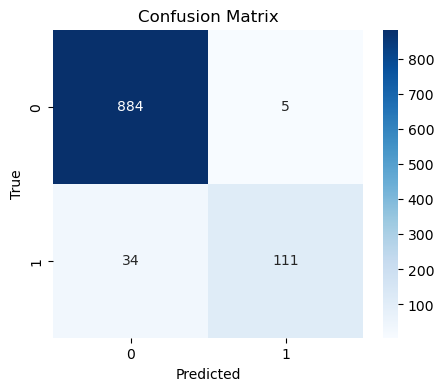

In [50]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print('\nclassification_report',classification_report(y_test, y_pred_nb))

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## SVC (CBOW)

SVC Accuracy: 0.8597678916827853

classification_report               precision    recall  f1-score   support

           0       0.86      1.00      0.92       889
           1       0.00      0.00      0.00       145

    accuracy                           0.86      1034
   macro avg       0.43      0.50      0.46      1034
weighted avg       0.74      0.86      0.79      1034



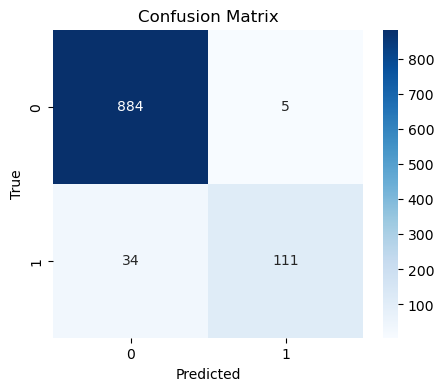

In [51]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print('\nclassification_report',classification_report(y_test, y_pred_svc))

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## WORD2VEC (SKIPGRAM)

In [52]:
model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, sg=1)  # sg=1 for SKIPGRAM

## Logistic Regression (SKIPGRAM)

Logistic Regression Accuracy: 0.8597678916827853

classification_report               precision    recall  f1-score   support

           0       0.86      1.00      0.92       889
           1       0.00      0.00      0.00       145

    accuracy                           0.86      1034
   macro avg       0.43      0.50      0.46      1034
weighted avg       0.74      0.86      0.79      1034



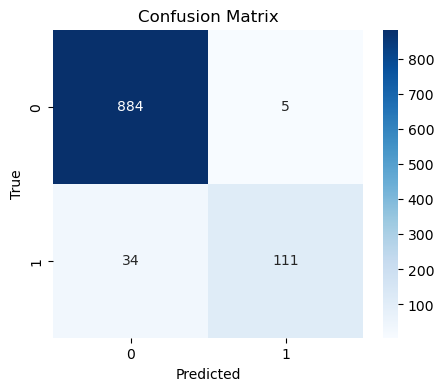

In [53]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print('\nclassification_report',classification_report(y_test, y_pred_log_reg))

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Naive Bayes (SKIPGRAM)

Naive Bayes Accuracy: 0.4961315280464217

classification_report               precision    recall  f1-score   support

           0       0.94      0.44      0.60       889
           1       0.19      0.82      0.31       145

    accuracy                           0.50      1034
   macro avg       0.57      0.63      0.46      1034
weighted avg       0.83      0.50      0.56      1034



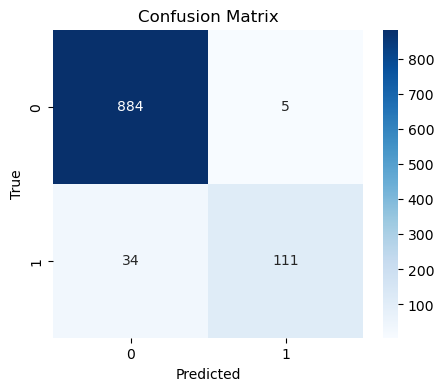

In [54]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print('\nclassification_report',classification_report(y_test, y_pred_nb))

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## SVC(SKIPGRAM)

SVC Accuracy: 0.8597678916827853

classification_report               precision    recall  f1-score   support

           0       0.86      1.00      0.92       889
           1       0.00      0.00      0.00       145

    accuracy                           0.86      1034
   macro avg       0.43      0.50      0.46      1034
weighted avg       0.74      0.86      0.79      1034



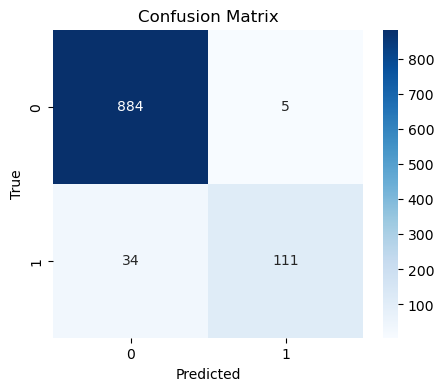

In [55]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print('\nclassification_report',classification_report(y_test, y_pred_svc))

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Prediction

In [69]:
sample=input('Enter a Message: ')
data=vectorizer.transform([sample]).toarray()
print(clf_GNB.predict(data))                     ## 1 stands for spam.

Enter a Message: you won $40 dollars
[1]


## THANK YOU